<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/Lec4_Time_series_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series Propertis-Random Walk-White Noise**

In [28]:
!pip install pyforest 
from pyforest import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
mydataraw = pd.read_excel("/content/oilpriceindex.xlsx", index_col=0)

<IPython.core.display.Javascript object>

In [30]:
mydataraw1 = mydataraw.copy()

In [31]:
mydataraw.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [32]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [33]:
mydataraw.isna()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,False,False,False,False
1990-02-01,False,False,False,False
1990-03-01,True,False,False,False
1990-04-01,False,False,False,False
1990-05-01,False,False,False,False
...,...,...,...,...
2019-09-01,False,False,False,False
2019-10-01,False,False,False,False
2019-11-01,False,False,False,False


In [34]:
mydataraw.isna().sum()

WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [35]:
mydataraw.NIFTY.isna().sum()

3

In [36]:
mydataraw1.WTI = mydataraw1.WTI.fillna(method='ffill') 

In [37]:
mydataraw1.isna().sum()

WTI      0
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [38]:
mydataraw1.BRENT = mydataraw1.BRENT.fillna(method='bfill') 

In [39]:
mydataraw1.isna().sum()

WTI      0
BRENT    0
INR      4
NIFTY    3
dtype: int64

In [40]:
mydataraw1.INR = mydataraw1.INR.fillna(method = 'ffill')

In [41]:
mydataraw1.isna().sum()

WTI      0
BRENT    0
INR      0
NIFTY    3
dtype: int64

In [42]:
mydataraw1.NIFTY = mydataraw1.NIFTY.fillna(value = mydataraw.NIFTY.mean())

In [43]:
mydataraw.isna().sum()

WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

<IPython.core.display.Javascript object>

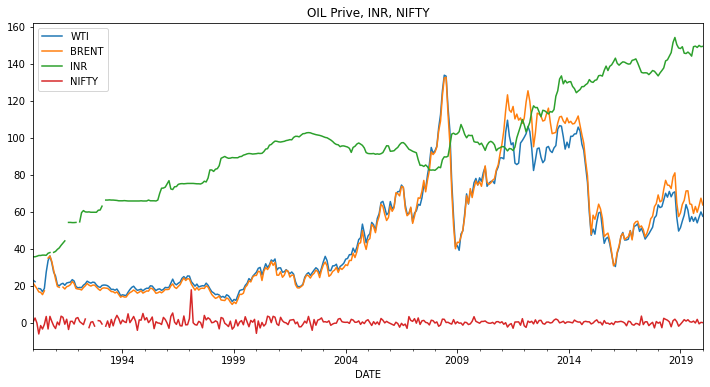

In [44]:
mydataraw.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")
plt.show()

<IPython.core.display.Javascript object>

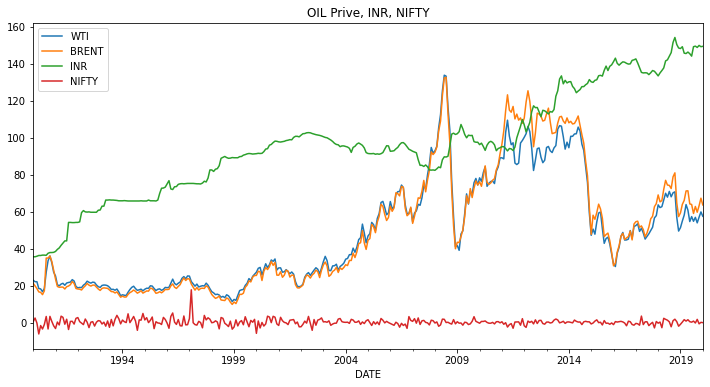

In [45]:
mydataraw1.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")

plt.show()

Quantile-Quantile Plot (QQ Plot)

In [46]:
import scipy.stats
import pylab

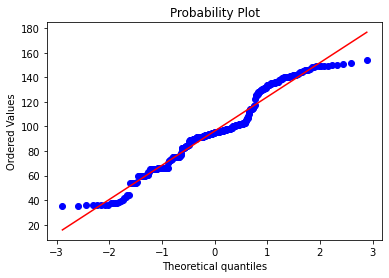

In [47]:
scipy.stats.probplot(mydataraw1.INR, plot = pylab)
pylab.show()

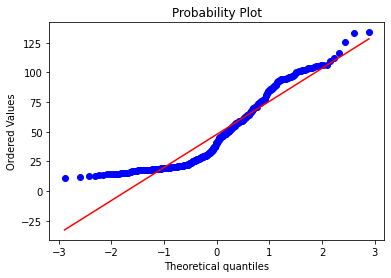

In [48]:
scipy.stats.probplot(mydataraw1.WTI, plot = pylab)
pylab.show()

In [49]:
import pandas as pd
import numpy as np


In [50]:
mydataraw1.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.207341,96.245983,0.193324
std,29.185056,32.816631,28.148450,1.882982
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.740000,75.500000,-0.760000
50%,40.780000,39.950000,95.100000,0.193324
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [51]:
mydataraw1.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,22.11,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [53]:
mydataraw1.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.207341,96.245983,0.193324
std,29.185056,32.816631,28.148450,1.882982
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.740000,75.500000,-0.760000
50%,40.780000,39.950000,95.100000,0.193324
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [55]:
mydatats = pd.read_excel("oilpriceindex.xlsx", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

In [56]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [57]:
mydatats.WTI = mydatats.WTI.fillna(method ='ffill')
mydatats.BRENT = mydatats.BRENT.fillna(method ='ffill')
mydatats.INR = mydatats.INR.fillna(method ='ffill')
mydatats.NIFTY = mydatats.NIFTY.fillna(method ='ffill')


**Create a duplicate variable**

In [58]:
mydatats['INR_INR'] = mydatats.INR

In [59]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,INR_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,96.245983
std,29.185056,32.851631,28.148450,1.889088,28.148450
min,11.350000,9.820000,35.600000,-6.180000,35.600000
25%,21.300000,19.570000,75.500000,-0.790000,75.500000
50%,40.780000,39.950000,95.100000,0.180000,95.100000
75%,68.060000,70.760000,113.800000,1.080000,113.800000
max,133.880000,132.720000,154.300000,17.740000,154.300000


In [60]:
del mydatats['INR_INR']

In [61]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557
std,29.185056,32.851631,28.148450,1.889088
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.570000,75.500000,-0.790000
50%,40.780000,39.950000,95.100000,0.180000
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


Spliting the data set into Training and Testing using (iloc)

In [62]:
len(mydatats)

361

In [63]:
size =int(len(mydatats)*0.8)
mydatats_train = mydatats.iloc[:size]
mydatats_test = mydatats.iloc[size:]


In [64]:
len(mydatats_train), len(mydatats_test)


(288, 73)

**White Noise**

In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import  seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,22.11,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [67]:
white_noise = np.random.normal(loc = mydatats.INR.mean(), scale= mydatats.INR.std(), size= len(mydatats))
mydatats['WN_INR'] = white_noise

In [68]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,101.618168
1990-02-01,22.11,19.81,35.6,2.45,97.281542
1990-03-01,22.11,18.39,35.9,-0.28,83.907938
1990-04-01,18.43,16.61,36.3,-6.18,73.286539
1990-05-01,18.20,16.35,36.3,-1.62,28.527946


In [69]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,WN_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,94.272329
std,29.185056,32.851631,28.148450,1.889088,26.373113
min,11.350000,9.820000,35.600000,-6.180000,14.800327
25%,21.300000,19.570000,75.500000,-0.790000,76.740904
50%,40.780000,39.950000,95.100000,0.180000,94.671925
75%,68.060000,70.760000,113.800000,1.080000,113.062708
max,133.880000,132.720000,154.300000,17.740000,170.850530


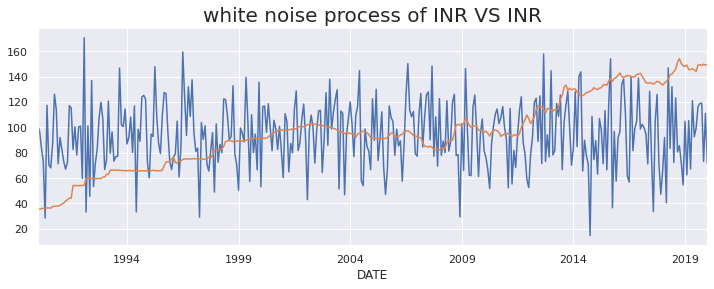

In [70]:
mydatats.WN_INR.plot(figsize=(12,4))
mydatats.INR.plot(figsize = (12,4))
plt.title('white noise process of INR VS INR', size = 20)
plt.show()

**UNIT Root**

In [71]:
sts.adfuller(mydatats.INR)

(-1.1290406537170836,
 0.7033530053152008,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1332.3497409741647)

INRt = alpha + beta1(INRt-1)

In [72]:
sts.adfuller(mydatats.WN_INR)

(-12.368814087933856,
 5.338605606802158e-23,
 2,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 3218.1463231282114)

In [73]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,101.618168
1990-02-01,22.11,19.81,35.6,2.45,97.281542
1990-03-01,22.11,18.39,35.9,-0.28,83.907938
1990-04-01,18.43,16.61,36.3,-6.18,73.286539
1990-05-01,18.20,16.35,36.3,-1.62,28.527946


**PCT**: ((Yt - Yt-1)/Yt-1) *100

In [74]:
mydatats['INR_pct'] = mydatats.INR.pct_change(1).mul(100)


In [75]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct
DATE,,,,,,
1990-01-01,22.86,21.25,35.6,0.44,101.618168,NaN
1990-02-01,22.11,19.81,35.6,2.45,97.281542,0.000000
1990-03-01,22.11,18.39,35.9,-0.28,83.907938,0.842697
1990-04-01,18.43,16.61,36.3,-6.18,73.286539,1.114206
1990-05-01,18.20,16.35,36.3,-1.62,28.527946,0.000000


In [76]:
mydatats = mydatats.iloc[1:]

In [81]:
mydatats["INR_diff"] = mydatats.INR.diff().dropna()
mydatats["INR_diff"] = mydatats.INR_diff.fillna(method='bfill')

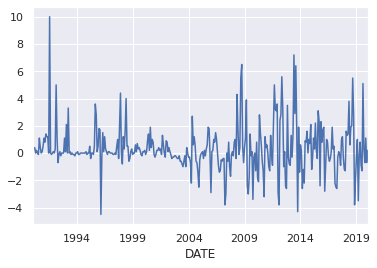

In [82]:
mydatats["INR_diff"].plot()

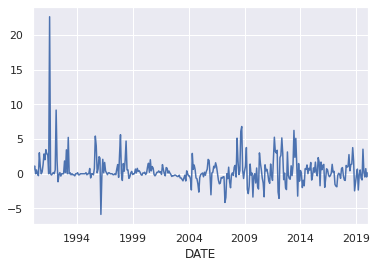

In [80]:
mydatats["INR_pct"].plot()

In [83]:
sts.adfuller(mydatats.INR_pct)

(-15.70894672146147,
 1.366977224522097e-28,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1457.1287069991165)

In [84]:
sts.adfuller(mydatats.INR_diff)

(-14.684104587853644,
 3.122754415903385e-27,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1328.4328642093606)

In [93]:
def stationarity_test(mydata):
  from statsmodels.tsa.stattools import adfuller 
  print("Result of ADF test: ")
  df_test = adfuller(mydata, autolag='AIC')
  df_output = pd.Series(df_test[0:4], index = ["Test Stat:", "P-Value:",\
                                               "Maximum Lag Used",\
                                               "deg 0f free:"])
  print(df_output)

In [94]:
stationarity_test(mydatats.INR_pct)

Result of ADF test: 
Test Stat:         -1.570895e+01
P-Value:            1.366977e-28
Maximum Lag Used    0.000000e+00
deg 0f free:        3.590000e+02
dtype: float64


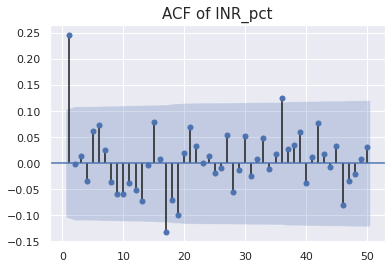

In [96]:
sgt.plot_acf(mydatats.INR_pct, lags=50, zero=False)
plt.title("ACF of INR_pct", size = 15)
plt.show()

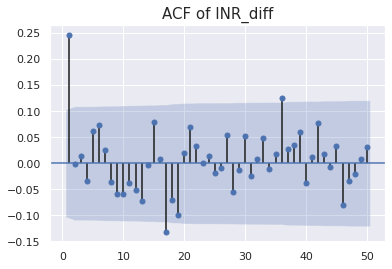

In [97]:
sgt.plot_acf(mydatats.INR_diff, lags=50, zero=False)
plt.title("ACF of INR_diff", size = 15)
plt.show()

Normalization is used to compare rest of the values with the base value

In [100]:
base_value = mydatats.INR.iloc[0]
mydatats["INR_norm"]  = mydatats.INR.div(base_value).mul(100)
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,Z_INR,INR_norm
DATE,,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,97.281542,0.000000,0.3,-2.171572,100.000000
1990-03-01,22.11,18.39,35.9,-0.28,83.907938,0.842697,0.3,-2.160860,100.842697
1990-04-01,18.43,16.61,36.3,-6.18,73.286539,1.114206,0.4,-2.146576,101.966292
1990-05-01,18.20,16.35,36.3,-1.62,28.527946,0.000000,0.0,-2.146576,101.966292
1990-06-01,16.70,15.10,36.5,-3.48,117.500661,0.550964,0.2,-2.139435,102.528090


Finding the z score 
z = (x - mean(x))/ std(x)

In [99]:
mean_dev= mydatats.INR.sub(mydatats.INR.mean())
mydatats["Z_INR"] = mean_dev.div(mydatats.INR.std())
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff,Z_INR
DATE,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,97.281542,0.000000,0.3,-2.171572
1990-03-01,22.11,18.39,35.9,-0.28,83.907938,0.842697,0.3,-2.160860
1990-04-01,18.43,16.61,36.3,-6.18,73.286539,1.114206,0.4,-2.146576
1990-05-01,18.20,16.35,36.3,-1.62,28.527946,0.000000,0.0,-2.146576
1990-06-01,16.70,15.10,36.5,-3.48,117.500661,0.550964,0.2,-2.139435


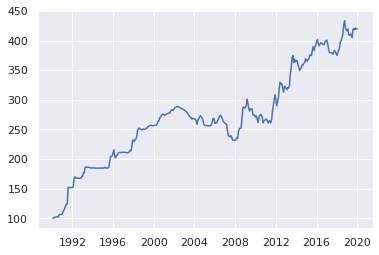

In [101]:
plt.plot(mydatats.INR_norm)

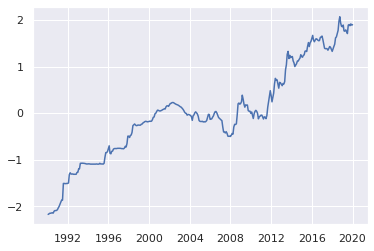

In [102]:
plt.plot(mydatats.Z_INR)

In [103]:
sts.adfuller(mydatats.Z_INR)

(-1.1307118716098998,
 0.7026702993551427,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 -950.0548470374181)

Autoregressive and Moving average method 

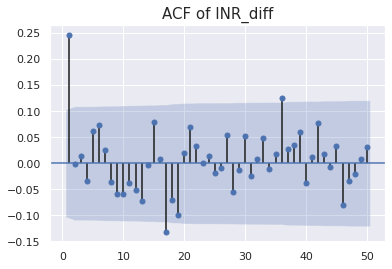

In [104]:
sgt.plot_acf(mydatats.INR_diff, lags=50, zero=False)
plt.title("ACF of INR_diff", size = 15)
plt.show()

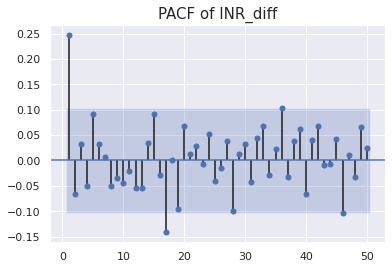

In [105]:
sgt.plot_pacf(mydatats.INR_diff, lags=50, zero=False)
plt.title("PACF of INR_diff", size = 15)
plt.show()

AR Model for INR 

In [106]:
from statsmodels.tsa.arima_model import ARMA 
from scipy.stats.distributions import chi2 


In [108]:
ret_ar1 = ARMA(mydatats.INR_diff, order=(1,0))  # we can only take difference or pct change and not normalized series
result_ret_ar1 = ret_ar1.fit()
print(result_ret_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 0)   Log Likelihood                -688.613
Method:                       css-mle   S.D. of innovations              1.639
Date:                Sat, 29 Aug 2020   AIC                           1383.226
Time:                        06:00:35   BIC                           1394.884
Sample:                    02-01-1990   HQIC                          1387.861
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3171      0.114      2.770      0.006       0.093       0.541
ar.L1.INR_diff     0.2462      0.051      4.828      0.000       0.146       0.346
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [110]:
ret_ar2 = ARMA(mydatats.INR_diff, order=(2,0))  # we can only take difference or pct change and not normalized series
result_ret_ar2 = ret_ar2.fit()
print(result_ret_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(2, 0)   Log Likelihood                -687.827
Method:                       css-mle   S.D. of innovations              1.635
Date:                Sat, 29 Aug 2020   AIC                           1383.653
Time:                        06:04:15   BIC                           1399.198
Sample:                    02-01-1990   HQIC                          1389.834
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3174      0.107      2.960      0.003       0.107       0.527
ar.L1.INR_diff     0.2625      0.053      4.998      0.000       0.160       0.365
ar.L2.INR_diff    -0.0659      0.052

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Model Validation

In [118]:
print(f" AR(1,0) LL= {round(result_ret_ar1.llf, 3)} , AIC= {round(result_ret_ar1.aic, 3)}")
print(f" AR(2,0) LL= {round(result_ret_ar2.llf, 3)} , AIC= {round(result_ret_ar2.aic, 3)}")

 AR(1,0) LL= -688.613 , AIC= 1383.226
 AR(2,0) LL= -687.827 , AIC= 1383.653


MA Models 

In [119]:
ret_ma1 = ARMA(mydatats.INR_diff, order=(0,1))  # we can only take difference or pct change and not normalized series
result_ret_ma1 = ret_ma1.fit()
print(result_ret_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(0, 1)   Log Likelihood                -687.553
Method:                       css-mle   S.D. of innovations              1.634
Date:                Sat, 29 Aug 2020   AIC                           1381.107
Time:                        06:26:22   BIC                           1392.765
Sample:                    02-01-1990   HQIC                          1385.742
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3174      0.109      2.900      0.004       0.103       0.532
ma.L1.INR_diff     0.2720      0.053      5.160      0.000       0.169       0.375
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [121]:
ret_ma2 = ARMA(mydatats.INR_diff, order=(0,2))  # we can only take difference or pct change and not normalized series
result_ret_ma2 = ret_ma2.fit()
print(result_ret_ma2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(0, 2)   Log Likelihood                -687.462
Method:                       css-mle   S.D. of innovations              1.633
Date:                Sat, 29 Aug 2020   AIC                           1382.923
Time:                        06:27:38   BIC                           1398.468
Sample:                    02-01-1990   HQIC                          1389.104
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3175      0.107      2.965      0.003       0.108       0.527
ma.L1.INR_diff     0.2684      0.052      5.133      0.000       0.166       0.371
ma.L2.INR_diff    -0.0238      0.056

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [122]:
print(f" MA(0,1) LL= {round(result_ret_ma1.llf, 3)} , AIC= {round(result_ret_ma1.aic, 3)}")
print(f" MA(0,2) LL= {round(result_ret_ma2.llf, 3)} , AIC= {round(result_ret_ma2.aic, 3)}")

 MA(0,1) LL= -687.553 , AIC= 1381.107
 MA(0,2) LL= -687.462 , AIC= 1382.923


ARMA

In [124]:
ret_arma11 = ARMA(mydatats.INR_diff, order=(1,1))  # we can only take difference or pct change and not normalized series
result_ret_arma11 = ret_arma11.fit()
print(result_ret_arma11.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 1)   Log Likelihood                -687.398
Method:                       css-mle   S.D. of innovations              1.633
Date:                Sat, 29 Aug 2020   AIC                           1382.796
Time:                        06:55:49   BIC                           1398.340
Sample:                    02-01-1990   HQIC                          1388.977
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3175      0.106      2.999      0.003       0.110       0.525
ar.L1.INR_diff    -0.1480      0.261     -0.568      0.571      -0.659       0.363
ma.L1.INR_diff     0.4130      0.245

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [125]:
ret_arma12 = ARMA(mydatats.INR_diff, order=(1,2))  # we can only take difference or pct change and not normalized series
result_ret_arma12 = ret_arma12.fit()
print(result_ret_arma12.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  360
Model:                     ARMA(1, 2)   Log Likelihood                -686.888
Method:                       css-mle   S.D. of innovations              1.631
Date:                Sat, 29 Aug 2020   AIC                           1383.777
Time:                        06:59:59   BIC                           1403.207
Sample:                    02-01-1990   HQIC                          1391.503
                         - 01-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3173      0.107      2.967      0.003       0.108       0.527
ar.L1.INR_diff    -0.6809      0.263     -2.591      0.010      -1.196      -0.166
ma.L1.INR_diff     0.9469      0.269

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Evaluate Residual 

In [126]:
mydatats["resid_ar1"]  = result_ret_ar1.resid

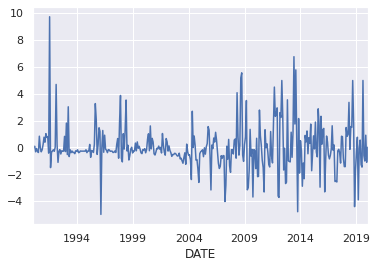

In [127]:
mydatats["resid_ar1"] .plot()

We check two things
1. Stationarity 
2. Non Autocorrelation


In [133]:
sts.adfuller(mydatats.resid_ar1)

(-16.505406369898388,
 2.129738145330655e-29,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1327.7899917618784)

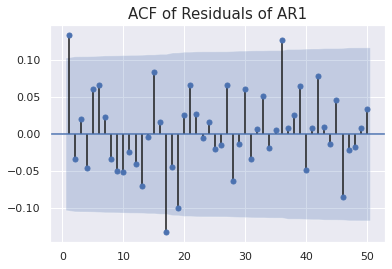

In [134]:
# Ideally all the points should be non significant inside the shaded region 
# Practically two three distant points away from each other is ok
sgt.plot_acf(mydatats.resid_ar1, lags=50, zero=False)
plt.title("ACF of Residuals of AR1", size = 15)
plt.show()

Histogram of Estimated Residuals

(array([0.01661958, 0.00830979, 0.00830979, 0.02492937, 0.01661958,
        0.03323916, 0.03323916, 0.05816852, 0.01661958, 0.04985873,
        0.09140768, 0.14126641, 0.19943493, 0.54013627, 0.68971247,
        0.21605451, 0.15788599, 0.19943493, 0.10802725, 0.0747881 ,
        0.05816852, 0.04985873, 0.02492937, 0.03323916, 0.01661958,
        0.02492937, 0.00830979, 0.00830979, 0.01661958, 0.02492937,
        0.00830979, 0.00830979, 0.00830979, 0.        , 0.        ,
        0.00830979, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00830979]),
 array([-4.98648329, -4.65220551, -4.31792772, -3.98364994, -3.64937216,
        -3.31509438, -2.98081659, -2.64653881, -2.31226103, -1.97798325,
        -1.64370546, -1.30942768, -0.9751499 , -0.64087212, -0.30659434,
         0.02768345,  0.36196123,  0.69623901,  1.03051679,  1.36479458,
         1.69907236,  2.03335014,  2.36762792,  2.70190571,  3.03618349,
         3.37046127,  3.70473905,

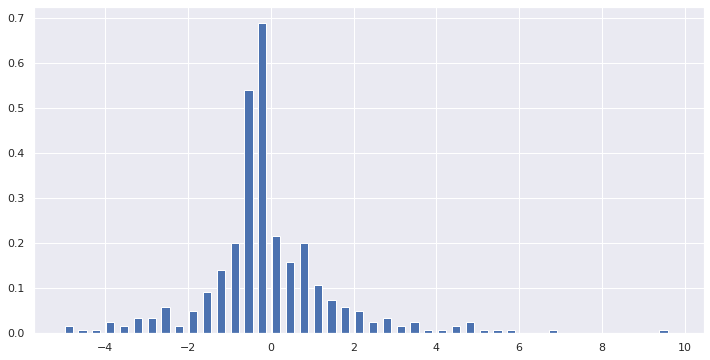

In [138]:
plt.figure(figsize=(12,6))
plt.hist(result_ret_ar1.resid, bins="auto", density=True, width=0.2)